<a href="https://colab.research.google.com/github/Malvodio/DeepHistory/blob/main/Data_Partitioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%matplotlib inline
import numpy as np 
import torch
import random
import os
from skimage import io, img_as_float32

## Seeds para reproducibilidad


In [4]:
def set_seed(seed):
  random.seed(seed)        
  torch.manual_seed(seed)  

set_seed(42)

## Partitioning on mini batches

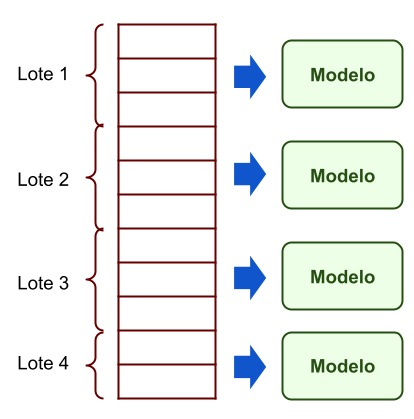


In [5]:
main_path = '/content/drive/MyDrive/vox-png/train' #Cambiar la ruta de ser necesario
test_path = '/content/drive/MyDrive/vox-png'

In [12]:
def directory_iter(files, batch_size, shuffle=True):
  n = files.shape[0]
  
  if shuffle:    
    indices = np.random.permutation(n)
  else:
    indices = range(n)

  for i in range(0, n, batch_size):    
    batch_indices = indices[i:i+batch_size if i+batch_size <=n else n]
    files_batch = files[batch_indices]
    yield files_batch

Probaremos la implementación mostrando el tamaño de cada lote:

In [13]:
files=np.array(os.listdir(main_path))

batch_size = 1000

total_samples = 0

mini_directory_bt=[]

for i, files_batch in enumerate(directory_iter(files, batch_size), 1):
  total_samples += files_batch.shape[0]
  """
  videos=[]
  if i == 1:
    for video in files_batch:
      video_array = []
      for i,image_name in enumerate(os.listdir(os.path.join(main_path,video))):
        video_array.append(torch.tensor(
              [img_as_float32(io.imread(os.path.join(os.path.join(main_path,video), image_name)))]))
      videos.append(video_array)
  mini_directory_bt.append(videos)
  """
  print(f'Lote {i} tiene tamaño {files_batch.shape[0]}')

if total_samples == files.shape[0]:
  print(':) El número total de muestras por lotes es correcto.')
else:
  print(':( El número total de muestras por lotes difiere del total de muestras.')

Lote 1 tiene tamaño 1000
Lote 2 tiene tamaño 1000
Lote 3 tiene tamaño 1000
Lote 4 tiene tamaño 1000
Lote 5 tiene tamaño 1000
Lote 6 tiene tamaño 1000
Lote 7 tiene tamaño 1000
Lote 8 tiene tamaño 1000
Lote 9 tiene tamaño 1000
Lote 10 tiene tamaño 1000
Lote 11 tiene tamaño 1000
Lote 12 tiene tamaño 1000
Lote 13 tiene tamaño 1000
Lote 14 tiene tamaño 1000
Lote 15 tiene tamaño 512
:) El número total de muestras por lotes es correcto.


In [46]:
print(mini_directory_bt[0][0])
mini_dir_path=os.path.join(path, mini_directory_bt[0][0])
print(os.listdir(mini_dir_path))
print(len(os.listdir(mini_dir_path)))

id10230#30uwDiaVKf0#000783#001015.mp4
['0000000.png', '0000005.png', '0000001.png', '0000003.png', '0000004.png', '0000002.png', '0000006.png', '0000015.png', '0000014.png', '0000007.png', '0000011.png', '0000012.png', '0000010.png', '0000008.png', '0000009.png', '0000013.png', '0000022.png', '0000019.png', '0000017.png', '0000025.png', '0000020.png', '0000023.png', '0000016.png', '0000021.png', '0000024.png', '0000026.png', '0000018.png', '0000029.png', '0000027.png', '0000030.png', '0000032.png', '0000034.png', '0000031.png', '0000035.png', '0000028.png', '0000036.png', '0000033.png', '0000037.png', '0000041.png', '0000046.png', '0000040.png', '0000038.png', '0000039.png', '0000042.png', '0000043.png', '0000044.png', '0000045.png', '0000047.png', '0000050.png', '0000053.png', '0000049.png', '0000051.png', '0000048.png', '0000055.png', '0000054.png', '0000052.png', '0000056.png', '0000065.png', '0000062.png', '0000064.png', '0000057.png', '0000061.png', '0000059.png', '0000063.png', '